In [1]:
import numpy as np                    #Rutvik Patel  -  Matr no - 649314
import pandas as pd                   #Sahil Sopariwalla - Matr no-648964
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\data set\Data Sets\possum.csv')

In [3]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [4]:
df1=pd.DataFrame(df.groupby(df.Pop)['age'].mean().sort_values(ascending=False))

In [5]:
df1

,age
Pop,
Vic,4.022727
other,3.689655


C:\Users\A\.conda\envs\jupycourse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A\.conda\envs\jupycourse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

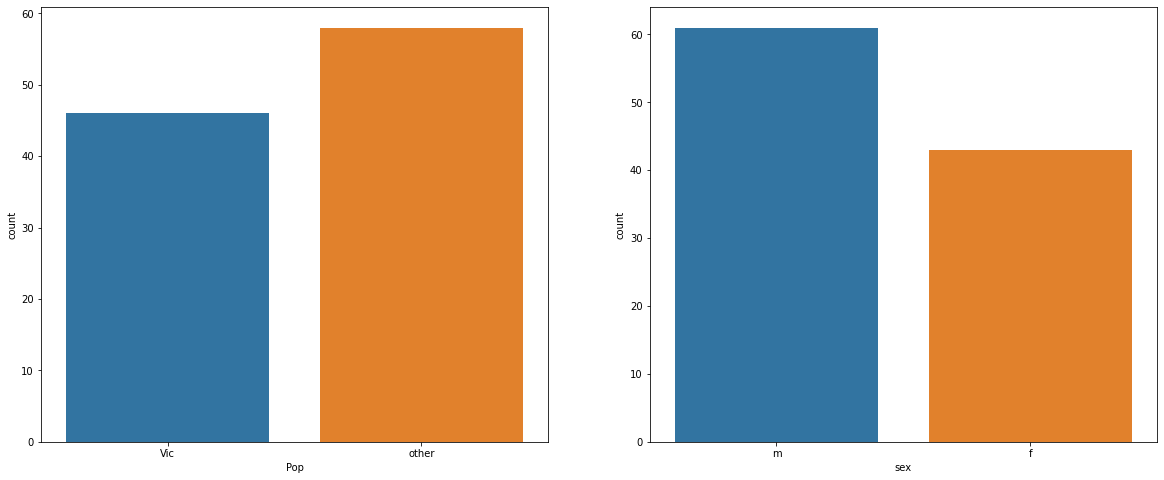

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(df.Pop)

plt.subplot(1,2,2)
sns.countplot(df.sex)





In [7]:
df.age.describe(percentiles=[0.25,0.50,0.75,1])

count    102.000000
mean       3.833333
std        1.909244
min        1.000000
25%        2.250000
50%        3.000000
75%        5.000000
100%       9.000000
max        9.000000
Name: age, dtype: float64

In [8]:
def plots(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df.hdlngth)
    plt.xlabel(x)
   
    


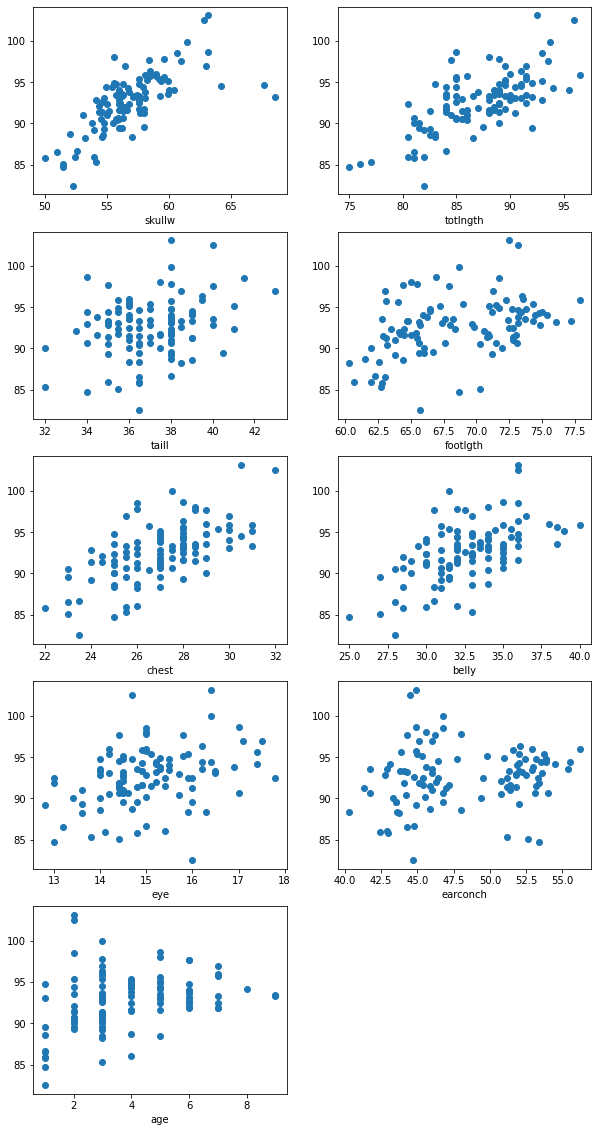

In [9]:
plt.figure(figsize=(10,20)) 
plots('skullw',1)
plots('totlngth',2)
plots('taill',3)
plots('footlgth',4)
plots('chest',5)
plots('belly',6)
plots('eye',7)
plots('earconch',8)
plots('age',9)

#as we can see in plots the hdlngth is linearly dependent on totlngth and hdlngth
#other feature makes hard to fit in regression line to predict hdlngth

In [10]:
plt.figure(figsize=(15,20))
df2=pd.DataFrame(df.groupby(['sex'])['hdlngth'].mean().sort_values(ascending=False))

<Figure size 1080x1440 with 0 Axes>

In [11]:
df2 #as we can notice there is not much difference in hdlngth of male and female

,hdlngth
sex,
m,92.922951
f,92.148837


In [12]:
df_lr=df.copy()

In [13]:
temp=pd.get_dummies(df['sex'],drop_first=True)

In [14]:
temp

,m
0,1
1,0
2,0
3,0
4,0
...,...
99,1
100,1
101,0
102,1


In [15]:
df_lr=pd.concat([df,temp],axis=1)
df_lr.drop(['sex'],axis=1,inplace=True)


In [16]:
df_lr


,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,m
0,1,1,Vic,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,2,1,Vic,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1
100,101,7,other,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1
101,102,7,other,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0
102,103,7,other,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1


In [17]:
temp=pd.get_dummies(df['Pop'],drop_first=True)
df_lr=pd.concat([df_lr,temp],axis=1)
df_lr.drop(['Pop'],axis=1,inplace=True)
df_lr

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,m,other
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1,1
100,101,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1,1
101,102,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,1
102,103,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1,1


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numvars=['hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']
df_lr[numvars]=scaler.fit_transform(df_lr[numvars])


In [19]:
df_lr

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,m,other
0,1,1,8.0,0.563107,0.559140,0.651163,0.363636,0.806818,0.893082,0.48,0.60,0.733333,1,0
1,2,1,6.0,0.485437,0.408602,0.767442,0.409091,0.693182,0.685535,0.64,0.65,0.533333,0,0
2,3,1,6.0,0.558252,0.537634,0.953488,0.636364,0.857955,0.729560,0.54,0.80,0.600000,0,0
3,4,1,6.0,0.519417,0.381720,0.790698,0.545455,0.897727,0.748428,0.48,0.60,0.600000,0,0
4,5,1,2.0,0.436893,0.338710,0.488372,0.363636,0.607955,0.811321,0.46,0.65,0.533333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,0.339806,0.322581,0.302326,0.409091,0.323864,0.408805,0.40,0.10,0.133333,1,1
100,101,7,1.0,0.296117,0.252688,0.348837,0.636364,0.232955,0.484277,0.24,0.30,0.533333,1,1
101,102,7,6.0,0.480583,0.268817,0.651163,0.545455,0.181818,0.320755,0.04,0.30,0.333333,0,1
102,103,7,4.0,0.436893,0.279570,0.348837,0.409091,0.147727,0.352201,0.52,0.30,0.266667,1,1


In [20]:
df_lr.drop(['case'],axis=1,inplace=True)

In [21]:
df_lrhd=df_lr.copy()


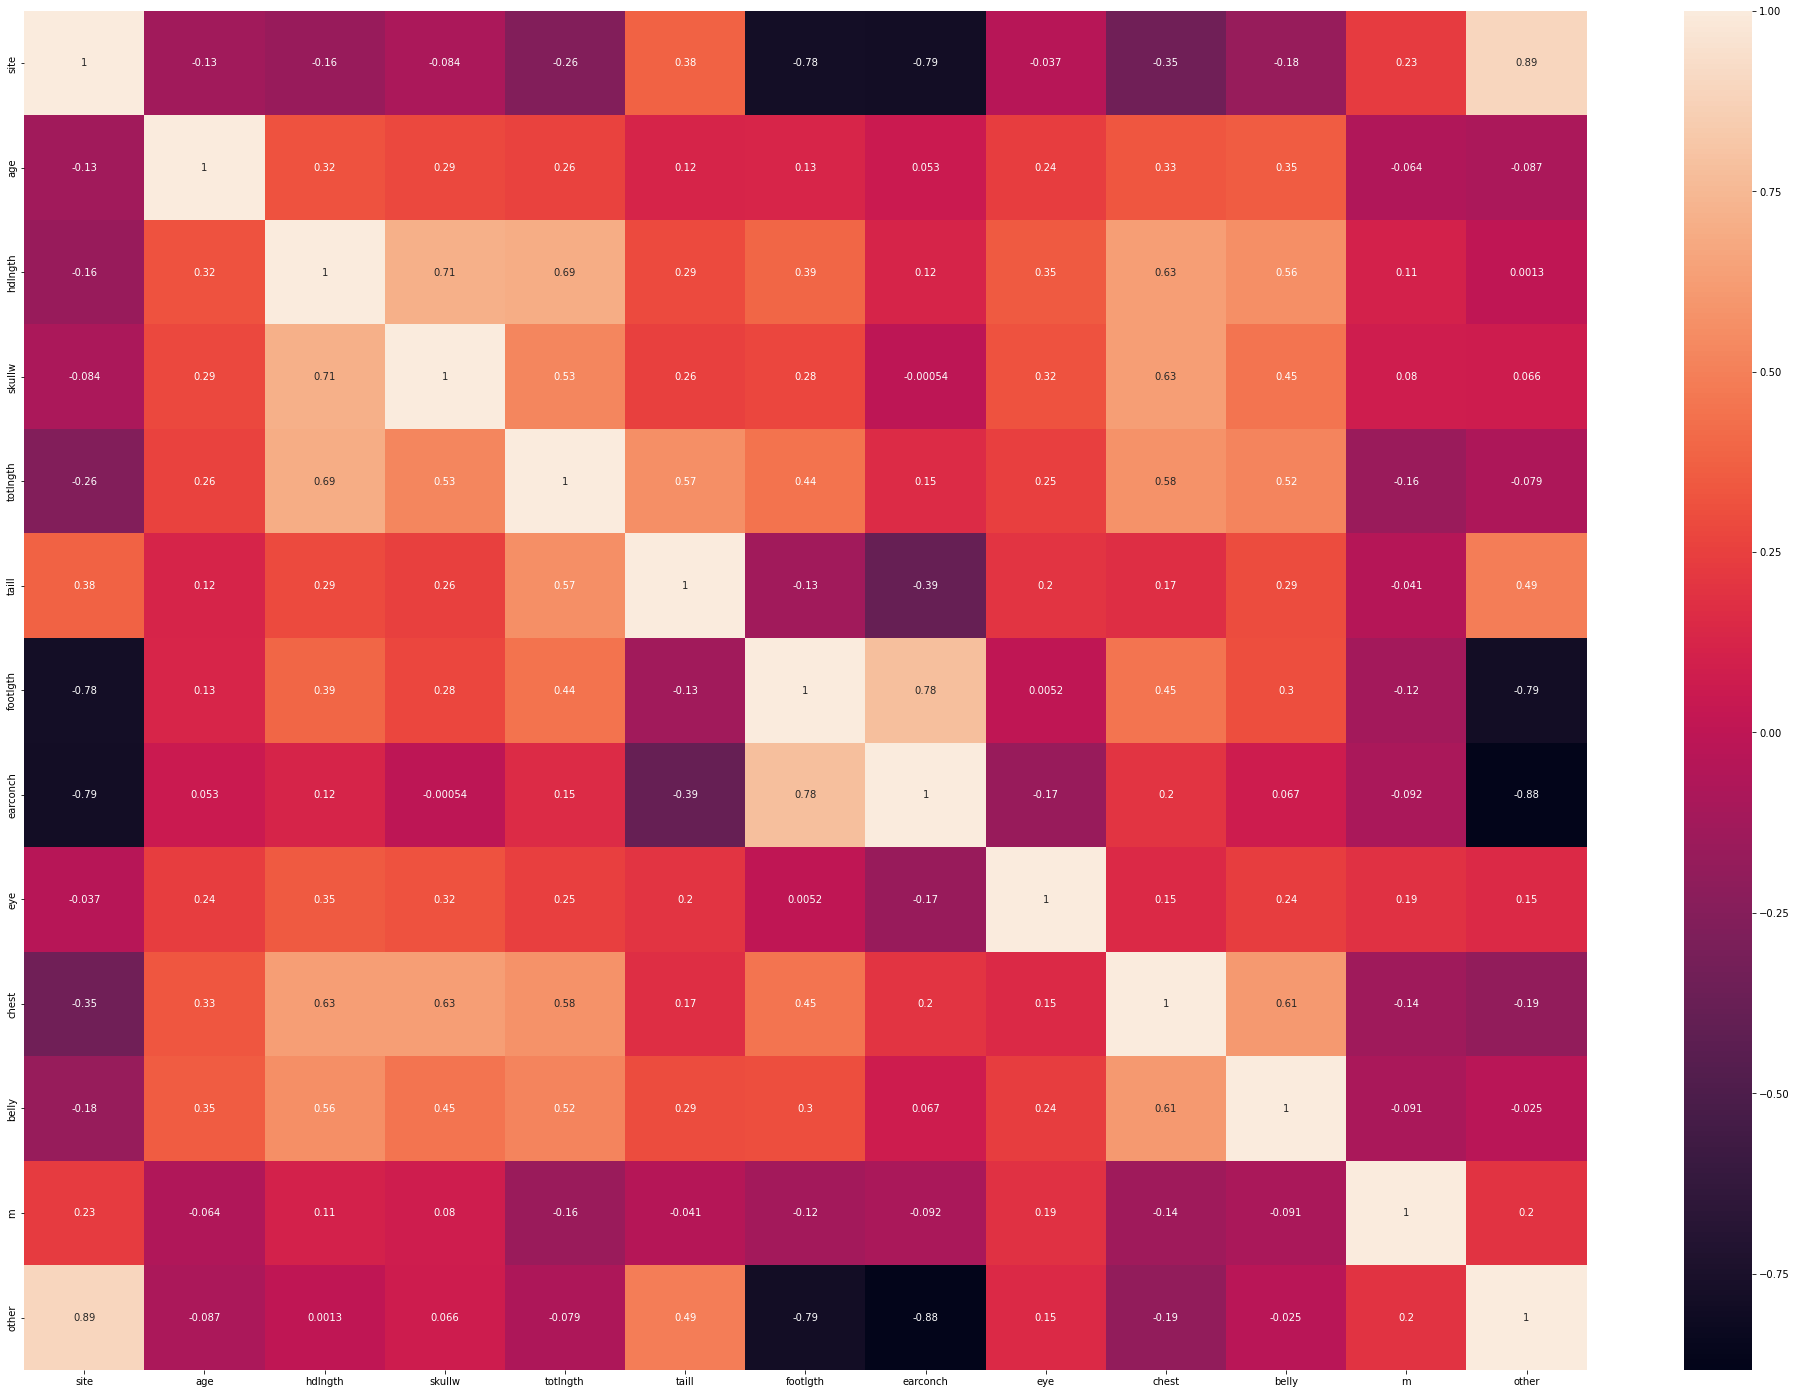

In [22]:
plt.figure(figsize=(35,25))
sns.heatmap(df_lrhd.corr(),annot=True)
plt.show()
#as we have visualize data in graphs earlier the correlation  is more strong  of hdlngth , skulw,totlngth ,we can see in our heatmap too

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_trainhd,df_testhd=train_test_split(df_lrhd,train_size=0.90,test_size=0.10,random_state=100)
#taking 90% data to train model

In [24]:
y_train=df_trainhd.pop('hdlngth')
x_train=df_trainhd
x_train['age'].fillna(x_train.groupby('m')['age'].transform('median'),inplace=True)
x_train['footlgth'].fillna(x_train.groupby('m')['footlgth'].transform('median'),inplace=True)
y_test=df_testhd.pop('hdlngth')
x_test=df_testhd
x_test['age'].fillna(x_test.groupby('m')['age'].transform('median'),inplace=True)
x_test['footlgth'].fillna(x_test.groupby('m')['age'].transform('median'),inplace=True)
#correctinh my train and test data set and filling values

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,n_features_to_select=5)
rfe=rfe.fit(x_train,y_train)
x_train_hd_rf=x_train[x_train.columns[rfe.support_]]
#here i got the error of nan values input in linear reg. model my x_train has nan values(this sud be check eaerlier)

In [27]:

x_train_hd_rf.head()

,skullw,totlngth,taill,footlgth,other
80,0.322581,0.488372,0.545455,0.301136,1
72,0.123656,0.325581,0.409091,0.306818,1
28,0.322581,0.604651,0.272727,0.829545,0
62,0.344086,0.627907,0.545455,0.215909,1
29,0.236559,0.418605,0.136364,0.585227,0


In [28]:
#here we can see to predict hdlngth we do not have sex (6)and age(7) among top 5 relevant features

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('site', False, 8),
 ('age', False, 7),
 ('skullw', True, 1),
 ('totlngth', True, 1),
 ('taill', True, 1),
 ('footlgth', True, 1),
 ('earconch', False, 2),
 ('eye', False, 5),
 ('chest', False, 4),
 ('belly', False, 3),
 ('m', False, 6),
 ('other', True, 1)]

In [30]:
def model_hd(x,y) :
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(x.head())
    print(lm.summary())
    return x
def check_vif(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif=vif.sort_values(by='vif',ascending=False)
    print(vif.head())
    return(vif)

    

In [31]:
x_train=model_hd(x_train,y_train)#as we see for p values of our x_train it indicates that site,age,eye,belly have higher p values

    const  site  age    skullw  totlngth     taill  footlgth  earconch   eye  \
80    1.0     6  3.0  0.322581  0.488372  0.545455  0.301136  0.088050  0.84   
72    1.0     5  1.0  0.123656  0.325581  0.409091  0.306818  0.276730  0.64   
28    1.0     1  3.0  0.322581  0.604651  0.272727  0.829545  0.723270  0.24   
62    1.0     5  6.0  0.344086  0.627907  0.545455  0.215909  0.377358  0.48   
29    1.0     1  2.0  0.236559  0.418605  0.136364  0.585227  0.660377  0.34   

    chest     belly  m  other  
80   0.55  0.666667  1      1  
72   0.15  0.200000  1      1  
28   0.20  0.466667  0      0  
62   0.35  0.233333  0      1  
29   0.25  0.533333  0      0  
                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.62
Date:      

In [32]:
x_train_newhd=model_hd(x_train_hd_rf,y_train)

    const    skullw  totlngth     taill  footlgth  other
80    1.0  0.322581  0.488372  0.545455  0.301136      1
72    1.0  0.123656  0.325581  0.409091  0.306818      1
28    1.0  0.322581  0.604651  0.272727  0.829545      0
62    1.0  0.344086  0.627907  0.545455  0.215909      1
29    1.0  0.236559  0.418605  0.136364  0.585227      0
                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     37.59
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           2.37e-20
Time:                        17:57:42   Log-Likelihood:                 88.282
No. Observations:                  93   AIC:                            -164.6
Df Residuals:                      87   BIC:                            -149.4
Df Model:                 

In [33]:
#as we can see all 5 features have lower p values and coef in confidence range
vif=check_vif(x_train_hd_rf)

   Features        vif
1  totlngth  23.860495
2     taill  20.948682
3  footlgth  10.918762
0    skullw   9.495492
4     other   7.499704


In [34]:
x_train_newhd2=x_train_newhd.drop(['taill'],axis=1)

In [35]:
x_train_newhd2=model_hd(x_train_newhd2,y_train)

    const    skullw  totlngth  footlgth  other
80    1.0  0.322581  0.488372  0.301136      1
72    1.0  0.123656  0.325581  0.306818      1
28    1.0  0.322581  0.604651  0.829545      0
62    1.0  0.344086  0.627907  0.215909      1
29    1.0  0.236559  0.418605  0.585227      0
                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     39.90
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           5.02e-19
Time:                        17:57:43   Log-Likelihood:                 82.879
No. Observations:                  93   AIC:                            -155.8
Df Residuals:                      88   BIC:                            -143.1
Df Model:                           4                                         
Covaria

In [36]:
x_train_newhd3=x_train_newhd2.drop(['totlngth'],axis=1)

x_train_newhd3=model_hd(x_train_newhd3,y_train)

    const    skullw  footlgth  other
80    1.0  0.322581  0.301136      1
72    1.0  0.123656  0.306818      1
28    1.0  0.322581  0.829545      0
62    1.0  0.344086  0.215909      1
29    1.0  0.236559  0.585227      0
                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           8.61e-16
Time:                        17:57:43   Log-Likelihood:                 72.849
No. Observations:                  93   AIC:                            -137.7
Df Residuals:                      89   BIC:                            -127.6
Df Model:                           3                                         
Covariance Type:            nonrobust                              

In [37]:
x_train_newhd4=x_train_newhd3.drop(['other'],axis=1)
vif=check_vif(x_train_newhd3)

   Features        vif
0     const  23.465193
2  footlgth   3.757985
3     other   3.504107
1    skullw   1.349036


In [38]:
#for predicting the hdlngth we need 
lr=sm.OLS(y_train,x_train_newhd3).fit()

<class 'pandas.core.series.Series'>
Int64Index: 93 entries, 80 to 8
Series name: None
Non-Null Count  Dtype  
--------------  -----  
93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


C:\Users\A\.conda\envs\jupycourse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

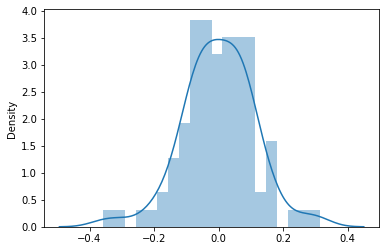

In [39]:
y_predict=lr.predict(x_train_newhd3)
y_predict.info()

sns.distplot((y_train - y_predict), bins = 20)

In [40]:
lm.fit(x_train,y_train)
y_predictlr=lm.predict(x_train)


In [41]:
from sklearn.metrics import r2_score
r2_score(y_train,y_predictlr)

0.7464288966058651

In [42]:
r2_score(y_train,y_predict)


0.5590088075639552

In [43]:
xtrain_hd=x_train_newhd3.drop(['const'],axis=1)
xtest_hd=x_test[xtrain_hd.columns]
xtest_hd=sm.add_constant(xtest_hd)

y_predict_test=lr.predict(xtest_hd)


In [44]:
r2_score(y_test,y_predict_test) # SCORE FOR REGRESSION MODEL CONSIDERING SELECTED  or after cleaning the data OF DATA FRAME ON UNTRAINED DATA

0.7347146076547053

In [45]:
x_test=sm.add_constant(x_test)# 
y_test_predictlm=lm.predict(x_test)

In [46]:
lm.score(x_test,y_test) #SCORE OF LINEAR REG. MODEL CONSIDERING ALL FEATURES ON UNTRAINED DATA

0.7011118256102771

In [47]:
# as we can see when we check score for test values the model accuracy incereases as we tried on tested data.
#our model gives better r2 score over untrained data

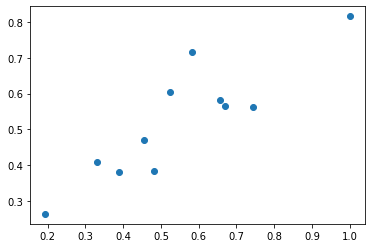

In [48]:
plt.scatter(y_test,y_predict_test)
#for lower hdlngth values trained model works better 

In [49]:
#for predicting hdlngth we need footlngth ,other and skullw



In [50]:
#now we train a model for age 
#bivariate analysis for age

In [51]:
def plots_age(x,fig):
    plt.subplot(5,2,fig)
    sns.scatterplot(x=df['age'],y=df[x],hue=df['sex'])
    plt.xlabel(x)
   
    


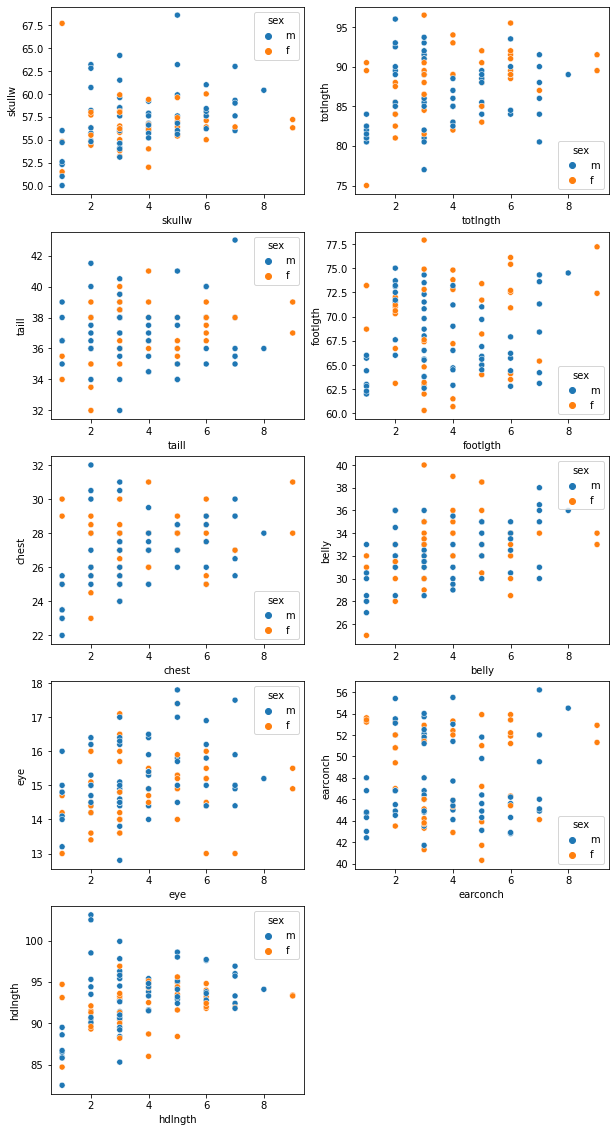

In [52]:
plt.figure(figsize=(10,20)) 
plots_age('skullw',1)
plots_age('totlngth',2)
plots_age('taill',3)
plots_age('footlgth',4)
plots_age('chest',5)
plots_age('belly',6)
plots_age('eye',7)
plots_age('earconch',8)
plots_age('hdlngth',9)
#graph for age is very distributed if we plot against numerical features its hard to predict age based on feature

In [53]:
from sklearn import tree
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [54]:
temp=pd.get_dummies(df['Pop'],drop_first=True)
x_age=pd.concat([df,temp],axis=1)
x_age.drop(['Pop'],axis=1,inplace=True)

In [55]:
temp=pd.get_dummies(x_age['sex'],drop_first=True)
x_age=pd.concat([x_age,temp],axis=1)
x_age.drop(['sex'],axis=1,inplace=True)

In [56]:
x_age.drop(['case'],axis=1,inplace=True)


In [57]:
x_age

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,other,m
0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,1
1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1,1
100,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1,1
101,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1,0
102,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1,1


In [58]:
y_age=x_age.pop('age')

In [59]:
x_age

,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,other,m
0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,1
1,1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,1,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,1,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,1,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1,1
100,7,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1,1
101,7,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1,0
102,7,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1,1


In [60]:
lr_age=LinearRegression()


In [61]:
y_age=y_age.fillna(method='ffill')  
y_age=pd.get_dummies(y_age)
y_age
x_age['footlgth'].fillna(x_age.groupby('m')['footlgth'].transform('median'),inplace=True)
x_agetrain,x_agetest,y_agetrain,y_agetest=train_test_split(x_age,y_age,train_size=0.75,test_size=0.25)
lr_age=lr_age.fit(x_agetrain,y_agetrain)


In [62]:
y_predict_age=lr_age.predict(x_agetest)


In [63]:
lr_age.score(x_agetest,y_agetest)

-0.17309314256151062

In [64]:
 # as we can see model is not doing too good in prepdicting age.

NameError: name 'tree_text' is not defined

In [ ]:
# for predicting sex
df

In [ ]:
m_f=df.drop(['case'],axis=1)

In [ ]:
m_f

In [ ]:
m_f.describe()

In [ ]:
m_f['Pop'] = m_f['Pop'].astype("category").cat.codes

In [ ]:
m_f['sex'] = m_f['sex'].astype("category").cat.codes

In [ ]:
m_f.footlgth.fillna(m_f.footlgth.mean(),inplace=True)
m_f.age.fillna(m_f.age.mean(),inplace=True)

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
m_f[pd.isnull(m_f).any(axis=1)]

In [ ]:
check_vif(m_f)

In [ ]:
m_f.drop(['sex'],axis=1,inplace=True)


In [ ]:
df_age=df.copy()
y_mf=df_age.pop('sex')
x_trainmf,x_testmf,y_trainmf,y_testmf=train_test_split(m_f,y_mf,train_size=0.70)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr1=LogisticRegression()
lr1.fit(x_trainmf,y_trainmf)

In [ ]:
y_pred=pd.Series(lr1.predict(x_testmf))
y_testmf=y_testmf.reset_index(drop=True)
z=pd.concat([y_pred,y_testmf],axis=1)
z.columns=['T','PRED']
z

In [ ]:
# here as we can see model is not performing too well , as i have no spcific experience in data cleaning for classification
#i can not trained model with selected features to perform classification on possum
#models for sex and age prediction is not working too well but linear model for hdlngth having good r2score